In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

You can see this notebook and get CSV file in: https://www.kaggle.com/leopoldozanellato/iris-eda-randomforest-logregression-crossval-ml

In [2]:
train = pd.read_csv('Iris.csv', index_col=0)

In [3]:
train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
train.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


How many species we have?

In [6]:
print(train['Species'].nunique())
print(train['Species'].unique())

3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Let's see the distribution of the data in each of the columns

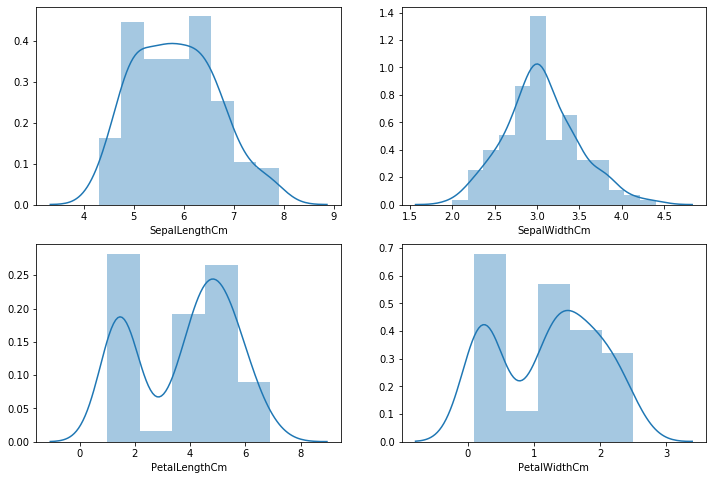

In [7]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0] = sns.distplot(train['SepalLengthCm'], ax=ax[0,0])
ax[0,1] = sns.distplot(train['SepalWidthCm'], ax=ax[0,1])
ax[1,0] = sns.distplot(train['PetalLengthCm'], ax=ax[1,0])
ax[1,1] = sns.distplot(train['PetalWidthCm'], ax=ax[1,1])

We have a mean of each column by specie

In [8]:
species = train.groupby('Species').mean()
species

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Now, boxplot of each column, and  we can see the difference between them


**What is boxplot?**

In descriptive statistics, a box plot or boxplot is a method for graphically depicting groups of numerical data through their quartiles.
Box plots may also have lines extending from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram.

Text(0.5, 1.0, 'PetalWidthCm')

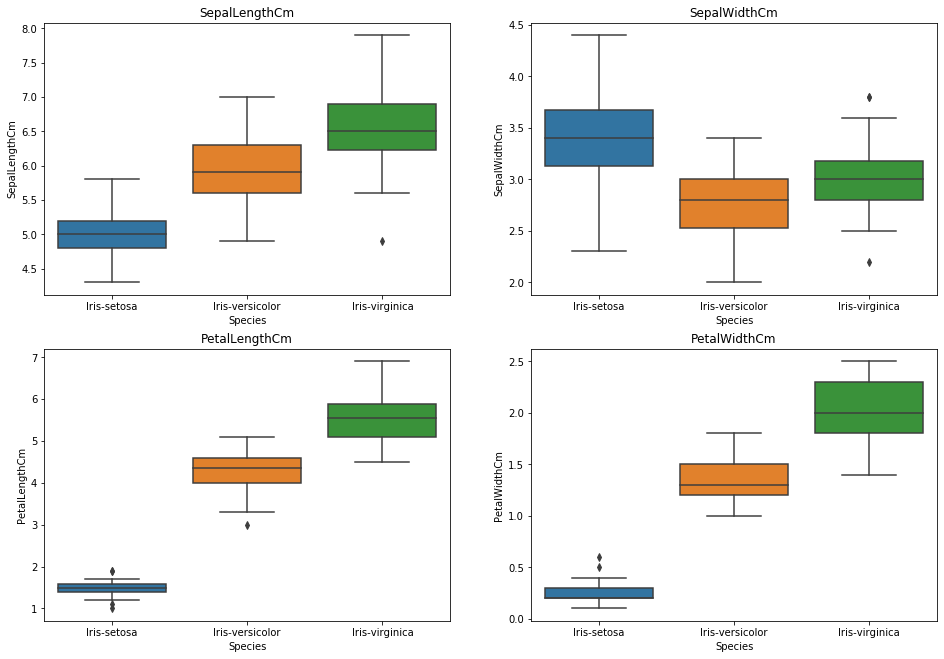

In [9]:
fig,ax = plt.subplots(2,2,figsize=(16,11))
ax[0,0] = sns.boxplot(x=train['Species'],y=train['SepalLengthCm'], ax=ax[0,0])
ax[0,0].set_title('SepalLengthCm')

ax[0,1] = sns.boxplot(x=train['Species'],y=train['SepalWidthCm'], ax=ax[0,1])
ax[0,1].set_title('SepalWidthCm')

ax[1,0] = sns.boxplot(x=train['Species'],y=train['PetalLengthCm'], ax=ax[1,0])
ax[1,0].set_title('PetalLengthCm')

ax[1,1] = sns.boxplot(x=train['Species'],y=train['PetalWidthCm'], ax=ax[1,1])
ax[1,1].set_title('PetalWidthCm')

Looking at this heat map correlation, we can see high correlation between PetalLengthCm and PetalWidthCm and low correlation between SepalWidhtCm and PetalLengthCm

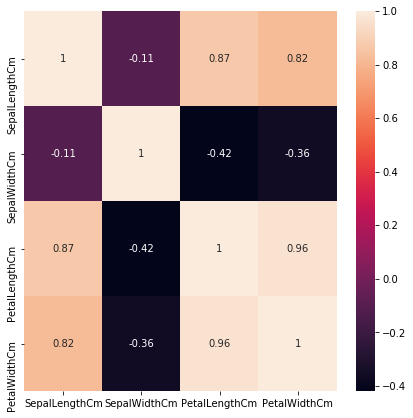

In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(train.corr(),annot = True)

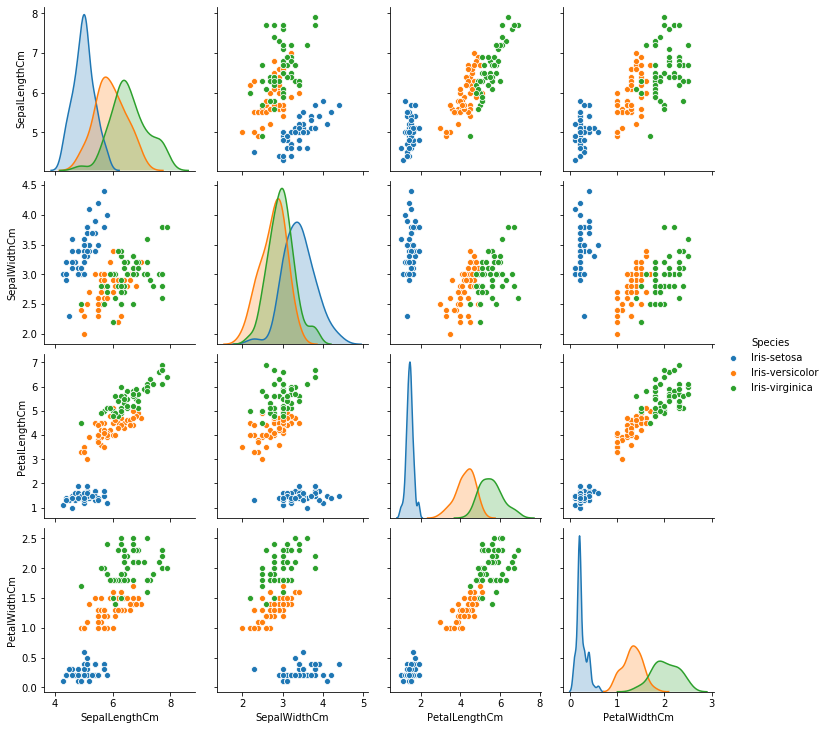

In [11]:
sns.pairplot(train,hue='Species')

Sccaterplot of **PetalLengthCm x SepalWidhtCm** and **PetalWidthCm x PetalLengthCm**


**What is scatterplot?**

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis

Text(0.5, 1.0, 'PetalWidthCm x PetalLengthCm')

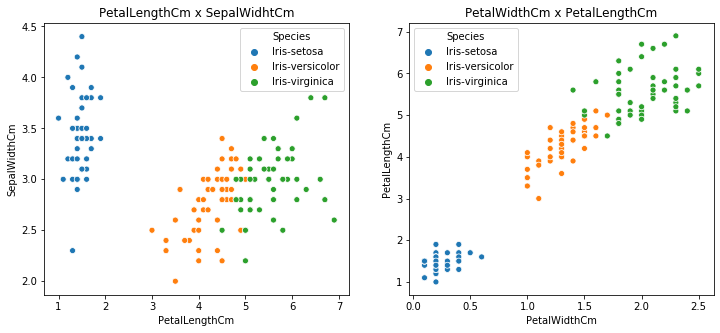

In [12]:
fig, ax= plt.subplots(1,2,figsize=(12,5))
ax[0] = sns.scatterplot(x=train['PetalLengthCm'],y=train['SepalWidthCm'],hue=train['Species'],ax=ax[0])
ax[0].set_title('PetalLengthCm x SepalWidhtCm')
ax[1] = sns.scatterplot(x=train['PetalWidthCm'],y=train['PetalLengthCm'],hue=train['Species'],ax=ax[1])
ax[1].set_title('PetalWidthCm x PetalLengthCm')

Start with model and split train/test. Test size will be 30% of the dataset, and random_state = 0)

In [13]:
y = train['Species']
x = train.drop('Species',axis=1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.3)

**First Model:** C-Support Vector Classification.

In [16]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(xtrain,ytrain)
svm_predict = model_svm.predict(xtest)
model_svm_acc = accuracy_score(ytest,svm_predict)
print(f'Accuracy score: {model_svm_acc}')

Accuracy score: 0.9777777777777777


**DecisionTreeClassifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)
model_tree = model.fit(xtrain,ytrain)
model_tree_predict = model.predict(xtest)
model_tree_acc = accuracy_score(ytest,model_tree_predict)
model_tree_acc

0.9777777777777777

**RandomForestClassifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier
for i in [100,200,300,400,500]:    
    model_random_forest = RandomForestClassifier(n_estimators=i,random_state = 42)
    model_random_forest.fit(xtrain,ytrain)
    model_forest_predict = model.predict(xtest)
    model_forest_accuaracy = accuracy_score(ytest,model_forest_predict)
    print(model_forest_accuaracy)

0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777


**LogisticRegression:**

In [19]:
from sklearn.linear_model import LogisticRegression
logist_regression = LogisticRegression(max_iter=200,random_state=42)
logist_regression.fit(xtrain,ytrain)
predict = logist_regression.predict(xtest)
logist_regression = accuracy_score(ytest,predict)
logist_regression

0.9777777777777777

**KNeighborsClassifier**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model_KN=KNeighborsClassifier(n_neighbors=5) 
model_KN.fit(xtrain,ytrain)
KN_predict =model_KN.predict(xtest)
KN_accuracy = accuracy_score(ytest,KN_predict)
KN_accuracy

0.9777777777777777

**Evaluate a score by cross-validation**

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [22]:
index = np.arange(1,6)

In [23]:
my_pipeline = Pipeline(steps=[('model', LogisticRegression(max_iter=200))])
scores =cross_val_score(my_pipeline, x, y,
                              cv=len(index),scoring='accuracy')

Text(0.5, 1.0, 'Accuracy with LogisticRegression')

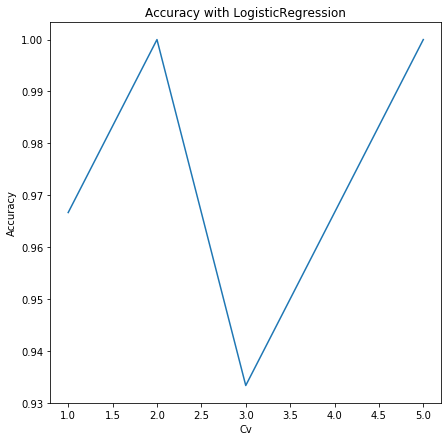

In [24]:
plt.figure(figsize=(7,7))
sns.lineplot(x=index,y=scores)
plt.ylabel('Accuracy')
plt.xlabel('Cv')
plt.title('Accuracy with LogisticRegression')

In [25]:
print(scores.mean())

0.9733333333333334
